![image alt <](Images/numgrade-bigger.jpg)
![](Images/seaborn_logo_reduced.png)

# Seaborn

Seaborn, c'est :

   - une API haut niveau (par rapport à matplotlib) / une surcouche de matplotlib,
    
   - de nombreuses fonctions pour tracer des plots statistiques,
    
   - un rendu (par défaut) qui est assez correct.

Il existe aussi une façon standard d'importer seaborn:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.__version__

'0.13.2'

Seaborn vient avec plusieurs jeux de données. Voyons un exemple avec le jeu de données tips (la liste des jeux de données est disponible via la function *get_dataset_names()*):

In [3]:
tips = sns.load_dataset('tips')
type(tips)

pandas.core.frame.DataFrame

Le jeu de données est chargé comme un DataFrame pandas.

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Le jeu de données indique quel pourboire donne les clients. Nous utiliserons ce jeu de données et d'autres pour plusieurs exemples de plot.

![image alt >](Images/numgrade.png)

## Theme

Par défaut, nous obtenons un tracé avec un fond blanc classique. Il est courant d'utiliser le "réglage par défaut" pour le rendu en exécutant cette commande :

In [5]:
sns.set_theme()

Il est possible d'aller sélectionner d'autres thèmes - voir par exemple la doc officiel : http://seaborn.pydata.org/tutorial/aesthetics.html

Pour l'instant, nous allons utiliser ce thème par défaut

![image alt >](Images/numgrade.png)

## API

L'API est assez simple et vous retrouvez les différentes parties à cette adresse : https://seaborn.pydata.org/api.html#distribution-api

Par exemple, pour la partie plot, nous allons trouver différentes sections :

 - Distribution plots
 
 - Relational plots
 
 - Categorical plots
 
 - Regression plots
 
 - Matrix plots
 
 - Multi-plot grids

![image alt >](Images/numgrade.png)

### 2 niveaux de fonctions : les "Figure-level" *vs* les "Axes-level"

![](Images/seaborn_functions_classification.png)

- Axes-level functions : ces fonctions tracent les données sur un unique objet matplotlib.pyplot.Axes.
    
- Figure-level functions : ces fonctions utilisent un objet seaborn pour mieux contrôler la figure.
    
Chaque module a une seule "Figure-level function" qui permet d'avoir une interface unique vers toutes les "Axes-level function". Pour réaliser un plot, il sera possible d'appeler directement les "Axes-level functions" ou de passer par la "Figure-level Function" correspondante.

Voyons la différence en pratique entre ces 2 façons de réaliser un plot avec les modules relplot (relational plot) et distplot (distribution plot). 

![image alt >](Images/numgrade.png)

## Relational plot

###  La fonction relplot()

Utilisons la "Figure-level function" *relplot()* pour commencer.

*relplot()* est donc une fonction qui permet de créer des graphiques relationnels, c’est-à-dire des graphiques qui montrent la relation entre deux variables (ou plus). Elle peut générer des nuages de points (scatter plots) ou des courbes (line plots), et permet de tracer les données selon une ou plusieurs variables catégorielles.

Pour cet exemple, nous allons utiliser un jeu de données sur les [manchots](https://fr.wikipedia.org/wiki/Sphenisciformes) :

In [6]:
penguins = sns.load_dataset("penguins")

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Traçons la "bill_depth_mm" en fonction de la "bill_length_mm" :

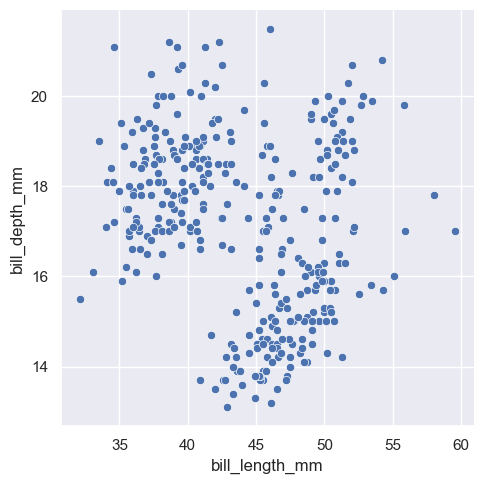

In [7]:
sns.relplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm", 
)
plt.show()

Par défaut, la fonction *relplot()* retourne un scatter plot.

Nous avons accès à de nombreuses options :

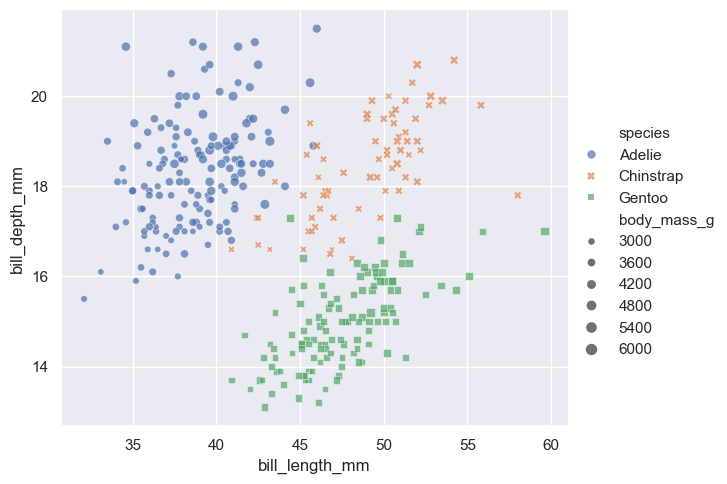

In [8]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", 
    y="bill_depth_mm",
    hue="species",       # color in function of the species
    style="species",     # point style in function of the species
    size="body_mass_g",  # point size in function of the mass
    alpha=0.7,           # transparency
    height=5,             # height of the plot
    aspect=1.2,          # ratio width/height
)
plt.show()

![image alt >](Images/numgrade.png)

Si on veut tracer des courbes, nous pourrons utiliser l'option kind :

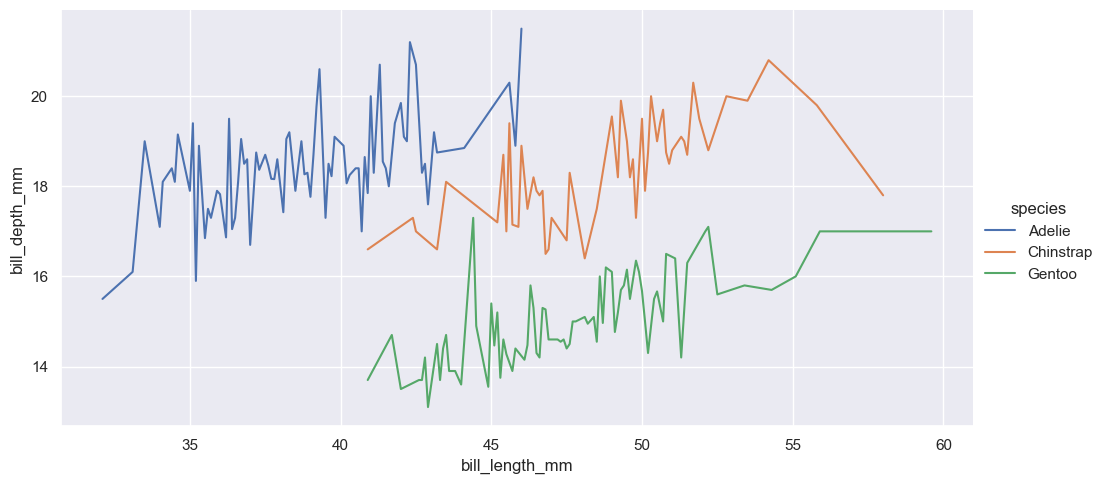

In [9]:
sns.relplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    kind="line",  # line plot
    height=5,
    aspect=2,
    errorbar=None,
)
plt.show()

Dans le cadre des "relational plots", il existe 2 "Axis-level function" *lineplot()* et *scatterplot()* que nous allons rapidement voir maintenant.

![image alt >](Images/numgrade.png)

### La fonction lineplot()

Nous pouvons donc tracer des courbes directement avec la fonction lineplot() :

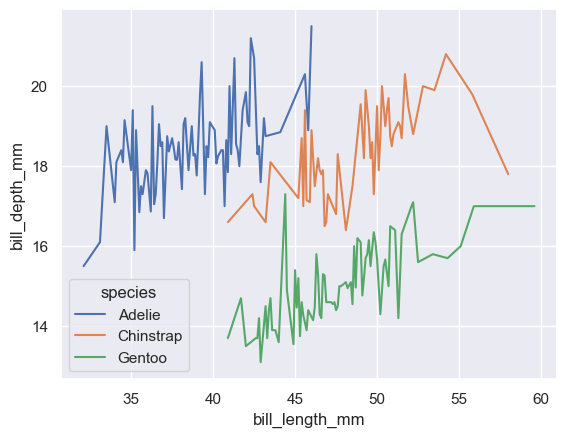

In [10]:
sns.lineplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    errorbar=None,
)
plt.show()

Notez quelques différences :

- *lineplot()* n'a pas de paramètres pour contrôler la taille de la figure. Nous pourrons le faire en passant par matplotlib en précisant par exemple *plt.figure(figsize=(..., ...))* avant d'appeler la fonction *lineplot()*.

- la légende se trouve dans le graphique contrairement à un positionnement à l'extérieur pour la fonction *relplot()*.

![image alt >](Images/numgrade.png)

### La fonction scatterplot()

Sur le même principe, nous pouvons faire appel à la fonction *scatterplot()* pour un nuage de points :

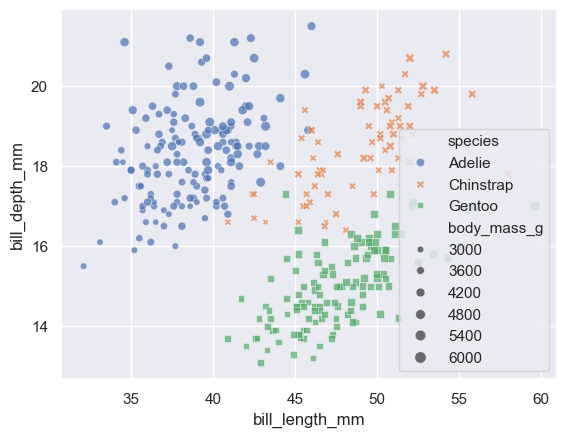

In [11]:
sns.scatterplot(
    data=penguins,
    x="bill_length_mm", 
    y="bill_depth_mm",
    hue="species",       # color in function of the species
    style="species",     # point style in function of the species
    size="body_mass_g",  # point size in function of the mass
    alpha=0.7,           # transparency
)
plt.show()

![image alt >](Images/numgrade.png)

## Distribution plot

Utilisons la "Figure-level function" *distplot()* pour commencer :

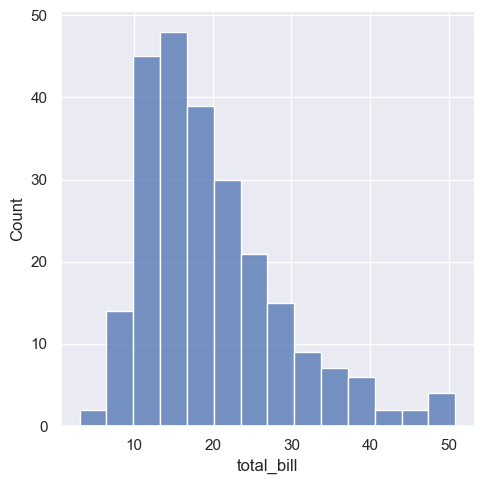

In [12]:
sns.displot(tips['total_bill']);   # we only need to indicate the column data we want to plot
# Il est possible d'augmenter le nombre de barres en utilisant l'option bins, par exemple :
# sns.distplot(tips['total_bill'], bins=30);

En fait, par défaut *displot()* trace l'histogramme, ce qui est donc équivalent à la "Axes-level function" *histplot()* :

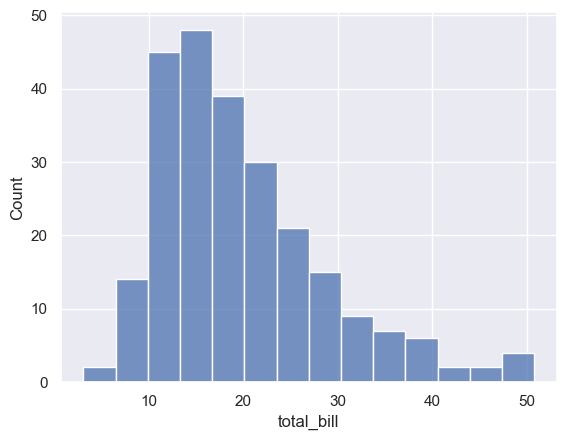

In [13]:
sns.histplot(tips['total_bill']);

Nous pouvons remarquer une autre différence entre une "Figure-level function" et une "Axes-level function" : par défaut, la taille de la figure est différente.

![image alt >](Images/numgrade.png)

Lorsque l'on trace, nous pouvons également passer tout le DataFrame aux fonctions et passer des options :

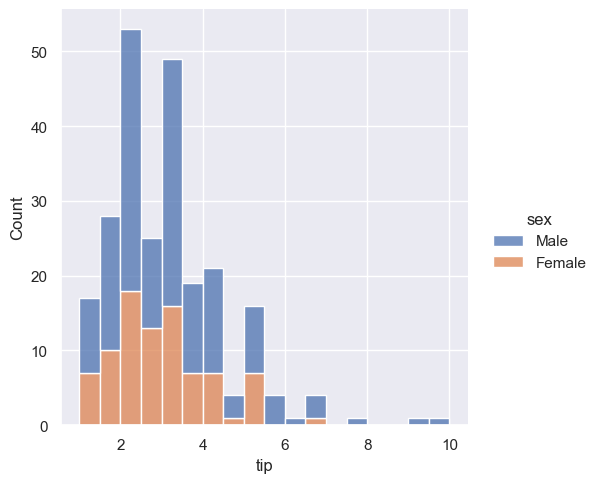

In [14]:
sns.displot(
    data=tips,
    x='tip',
    hue='sex',   # "color encoding"
    multiple='stack', 
);

Nous pouvons passer les mêmes paramètres à la fonction *histplot()* :

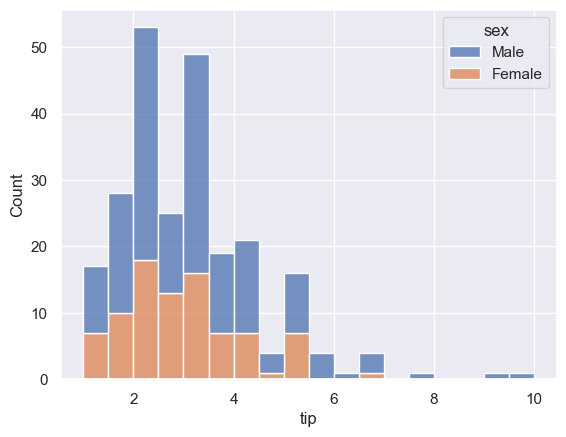

In [15]:
sns.histplot(
    data=tips,
    x='tip',
    hue='sex',   # "color encoding"
    multiple='stack', 
);

Comme nous l'avions déjà remarqué pour les graphiques relationnels (relational plots), la légende est placée à l'extérieur avec *distplot()* ("Figure-level function") alors qu'elle est à l'intérieur avec *histplot()* ("Axes-level function").

![image alt >](Images/numgrade.png)

Un avantage de la "Figure-level function" est qu'il est possible de créer facilement des "subplots" (au contraire des *Axes-level functions*) :

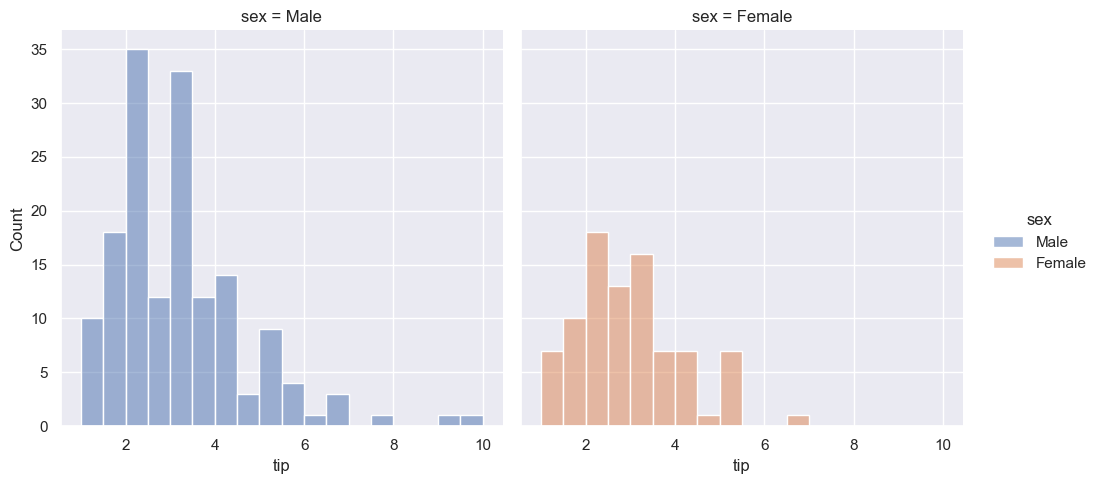

In [16]:
sns.displot(
    data=tips,
    x='tip',
    hue='sex',   # "color encoding"
    col='sex', 
);

Si l'on souhaite utiliser la "Figure-level function" pour tracer un autre type de graphique, c'est possible en spécifiant l'option *kind* :

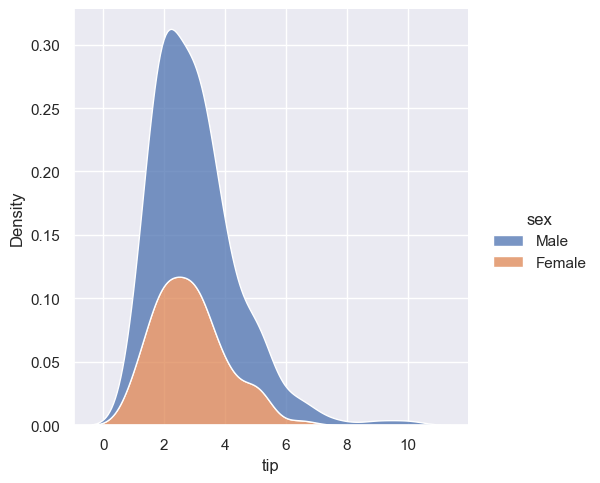

In [17]:
sns.displot(
    data=tips,
    x='tip',
    hue='sex',   # "color encoding"
    multiple='stack',  # filled the curves
    kind='kde',  # kernel density estimate / continuous probability density curve
);

Le résultat est un histogramme avec une [estimation par noyau](https://fr.wikipedia.org/wiki/Estimation_par_noyau) (KDE en anglais pour Kernel Density Estimation).

"Behind the scene", la "Figure-level function" va faire appel aux "Axes-level functions", elles auront les mêmes fonctionnalités mais il y a un désavantage à passer par la "Figure-level function" :
les paramètres spécifiques aux fonctions "Axes-level functions" n'apparaissent pas en premier niveau dans la documentation, ce qui rend les options moins découvrables lorsque l'on passe par la "Figure-level function".

![image alt >](Images/numgrade.png)

## Multi-plot grids

Il est possible de comparer la distribution de 2 jeux de données avec *jointplot()*. Par exemple, si on veut comparer la distribution de *total_bill* avec celle de *tip* :

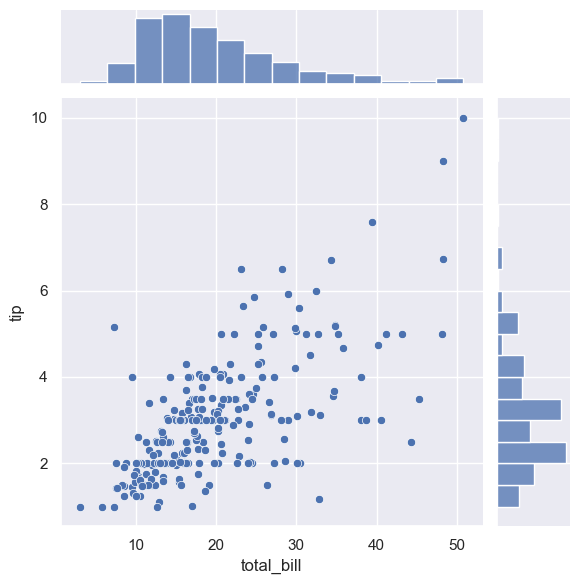

In [18]:
# You indicate the 2 columns you want to compare as x and y 
# and you must specify the option data which corresponds to the DataFrame
sns.jointplot(x='total_bill', y='tip', data=tips);

Le résultat est un graphique en nuage de points au centre et 2 histogrammes sur les cotés.
Il est possible de modifier la représentation du graphique central avec l'option *kind* :

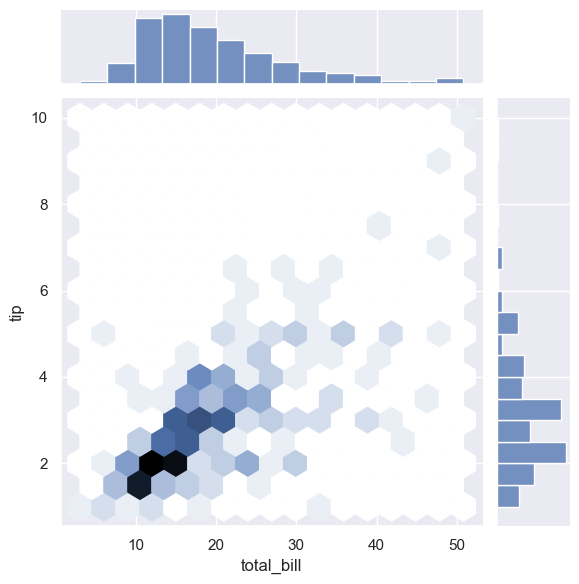

In [19]:
# Example, representation with hexagons (more points = darker)
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex');

![image alt >](Images/numgrade.png)

Il est possible d'obtenir une [régression linéaire](https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) en précisant 'reg' à l'option *kind* :

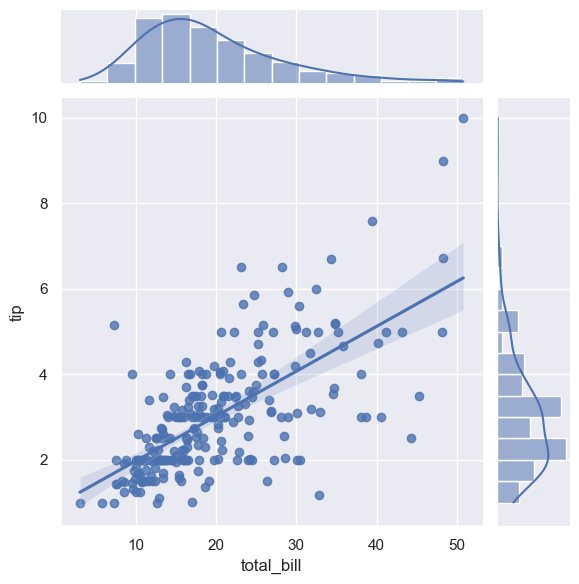

In [20]:
# linear regression
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg');

Avec 'kde' (Kernel Density Estimation), on obtiendra une estimation par noyau en 2D :

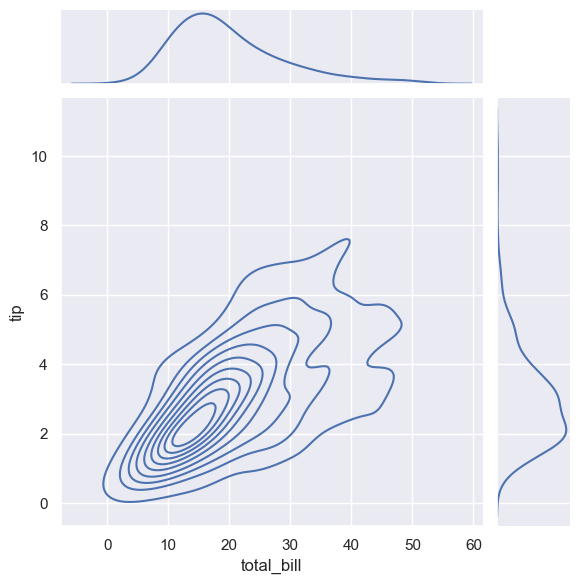

In [21]:
# density where the points match up the most 
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde');      

![image alt >](Images/numgrade.png)

### Un jointplot() pour toutes les colonnes avec pairplot()

Avec *pairplot()*, on compare les jeux de données pour tout le DataFrame:

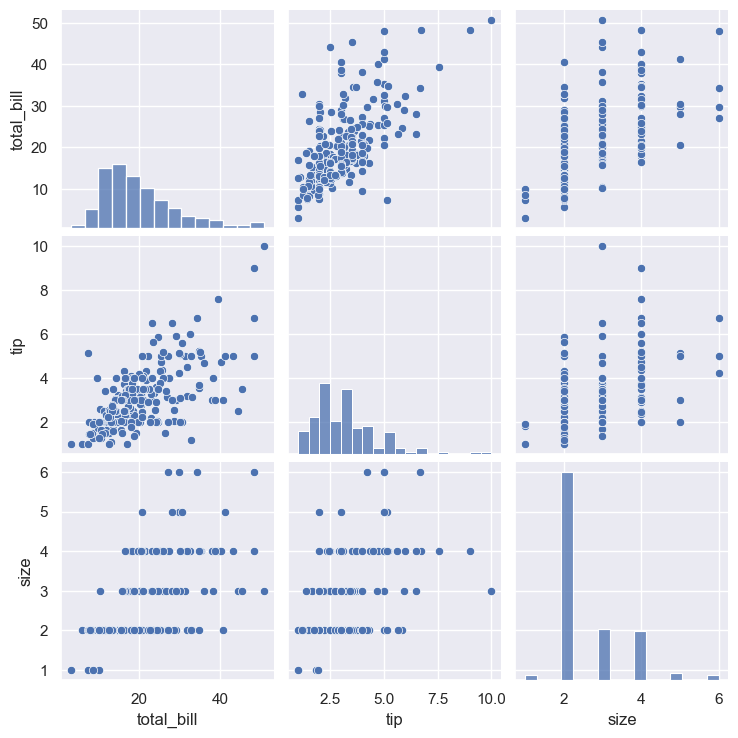

In [22]:
sns.pairplot(tips);

Sur la diagonale, au lieu d'avoir une régression linéaire parfaite (qui n'aurait guère de sens), l'histogramme est tracé.

![image alt >](Images/numgrade.png)

Il est aussi possible de spécifié avec l'option *hue*, une [variable catégorielle](https://fr.wikipedia.org/wiki/Variable_cat%C3%A9gorielle):

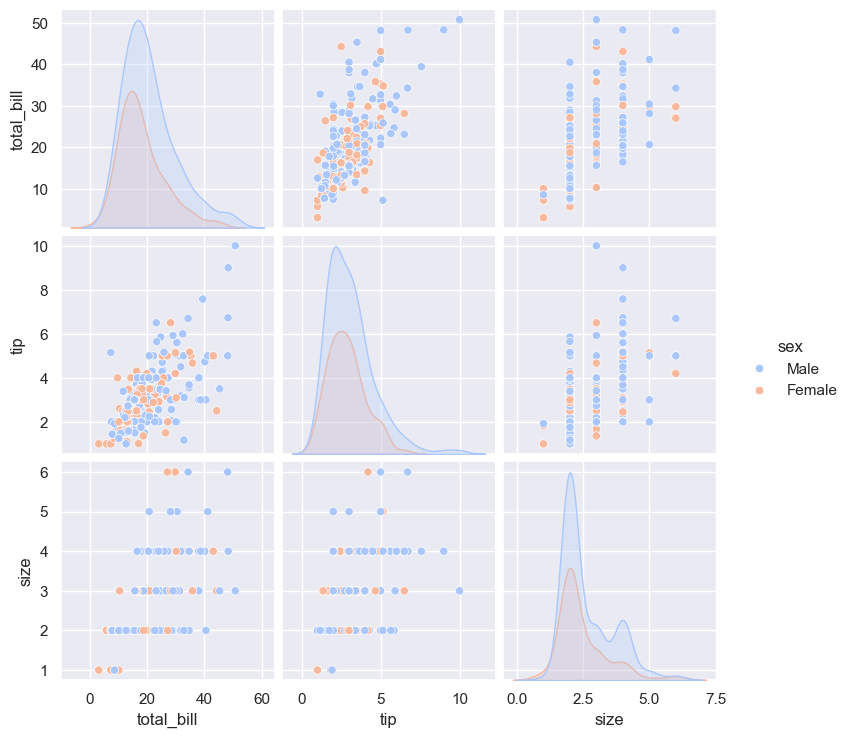

In [23]:
# the palette option is for the colors
sns.pairplot(tips, hue='sex', palette='coolwarm');

![image alt >](Images/numgrade.png)

## Categorical plots

### Bar plot

On choisit en x une variable catégorielle, en y une variable numérique et pour data, on indique le DataFrame. Par défaut, le graphique en bâton sera présenté avec la moyenne :

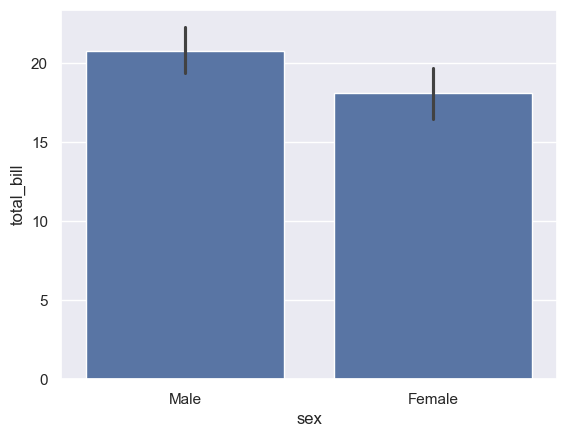

In [24]:
sns.barplot(x='sex', y='total_bill', data=tips);

Si on veut représenter autre chose que la moyenne, il faudra préciser l'option *estimator* :

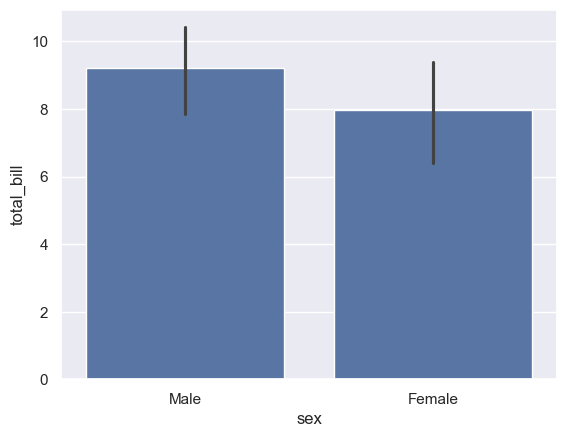

In [25]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std);

![image alt >](Images/numgrade.png)

### Count plot

Représentation du nombre d'occurence:

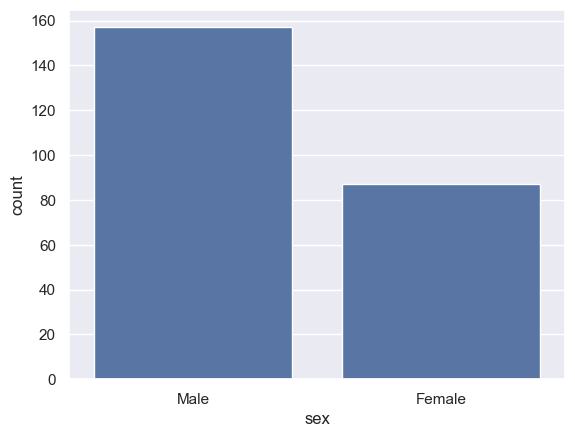

In [26]:
sns.countplot(x='sex', data=tips);

![image alt >](Images/numgrade.png)

### Box plot

Représentation boîte à moustache :

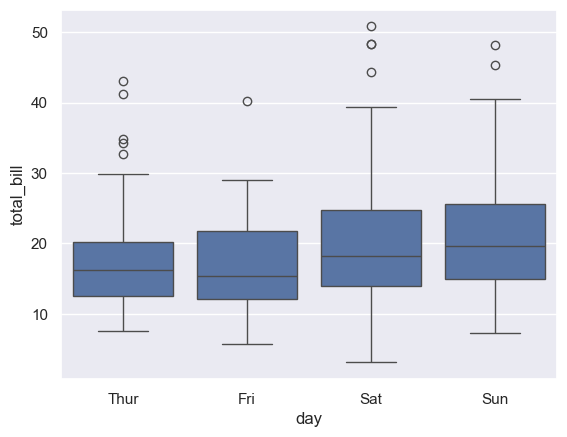

In [27]:
sns.boxplot(x='day', y='total_bill', data=tips);

Avec l'option *hue*, il est possible d'ajouter une autre variable catégorielle :

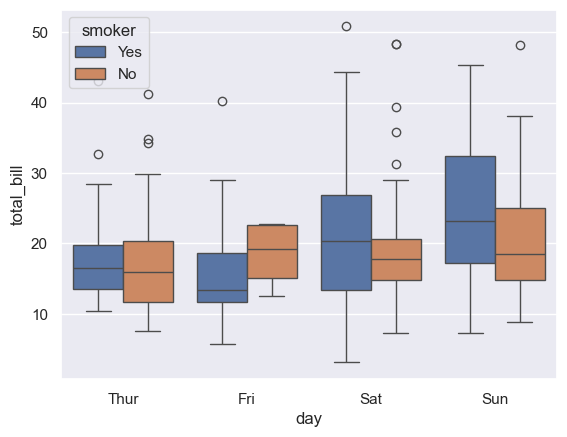

In [28]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker');

![image alt >](Images/numgrade.png)

### Violin plot

L'équivalent d'une boîte à moustache avec une représentation "violon" :

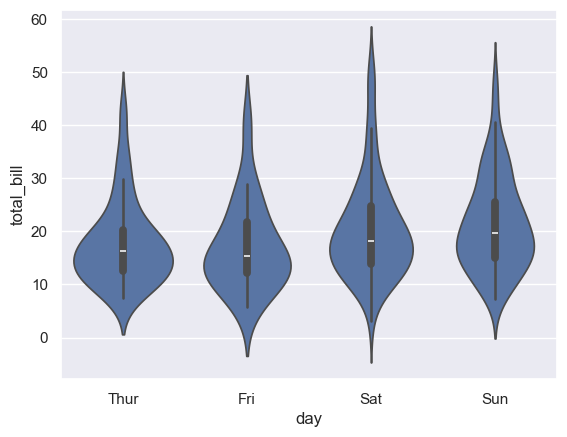

In [29]:
sns.violinplot(x='day', y='total_bill', data=tips);

Le diagramme en violon est similaire aux diagrammes en boîte, sauf qu'ils montrent également la densité de probabilité des données à différentes valeurs (source [Wikipedia](https://en.wikipedia.org/wiki/Violin_plot)).

Il est aussi possible de rajouter une variable catégorielle avec l'option *hue* :

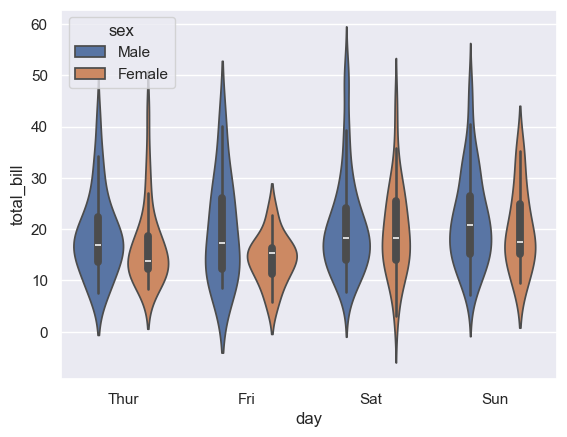

In [30]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex');

Et il est possible de mixer les "violons" précédents avec l'option *split* :

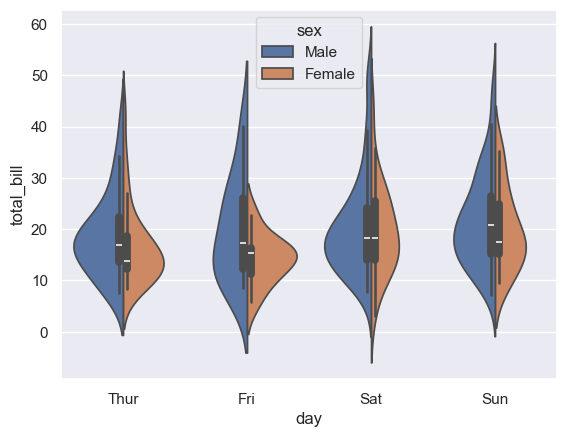

In [31]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True);

![image alt >](Images/numgrade.png)

### Strip plot

Représentation en nuage de points lorsqu'une variabe est catégorielle :

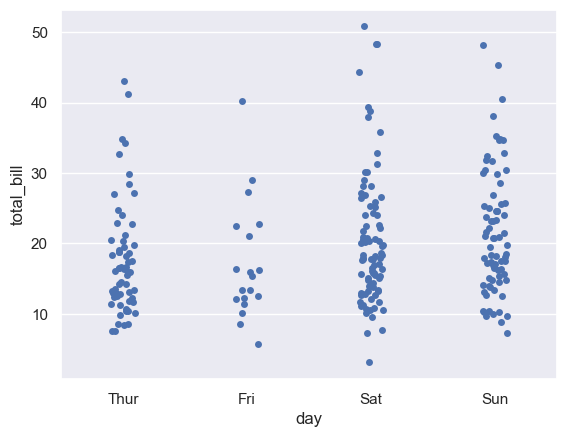

In [32]:
sns.stripplot(x='day', y='total_bill', data=tips);

Avec cette représentation, de nombreux points se recouvrent et on ne peut pas les distinguer. On peut améliorer la situation avec l'option *jitter*:

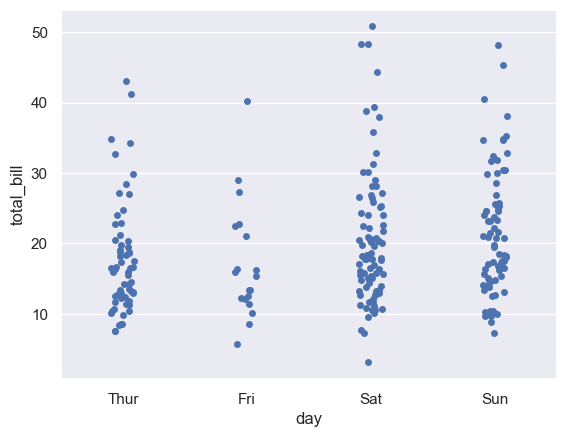

In [33]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True);

Cette option ajoute du bruit aléatoirement, ce qui permet de mieux visualiser tous les points.

Et il est bien entendu possible aussi d'ajouter une autre variable catégorielle avec l'option *hue* :

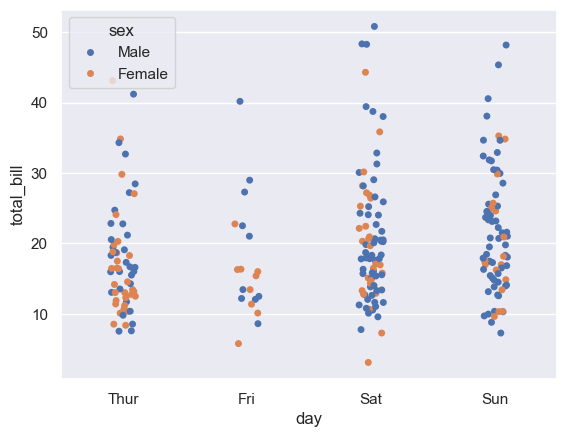

In [34]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex');

Pour une meilleure visualisation, on pourra aussi ajouter l'option *dodge* :

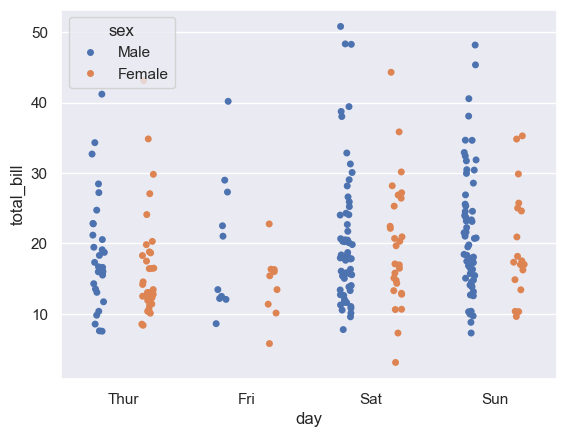

In [35]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', dodge=True);

![image alt >](Images/numgrade.png)

### Swarm plot

Combiner le violin plot et le strip plot :

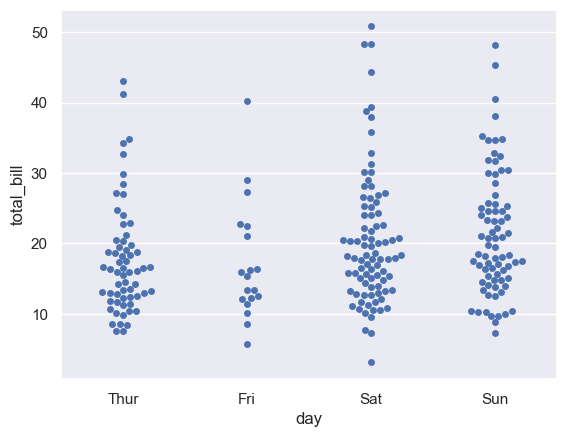

In [36]:
sns.swarmplot(x='day', y='total_bill', data=tips);

Ce type de graphique ne sera pas adapté pour des données trop importantes. Et comme il est assez peu populaire, les gens auront probablement du mal à l'interpréter.

Notez qu'il est possible de superposer un violin plot avec un swarm plot :

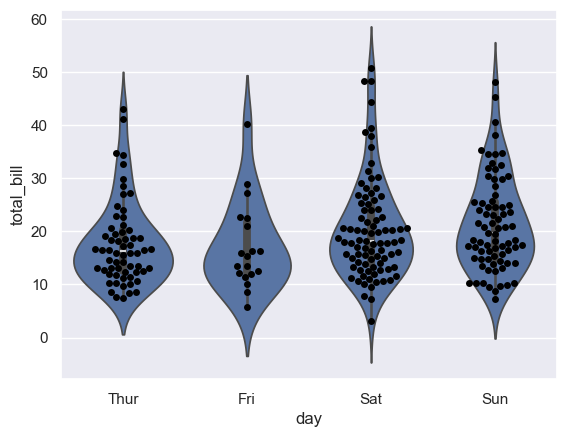

In [37]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black');

![image alt >](Images/numgrade.png)

### Cat plot

Il est possible de créer tous les graphiques précédents en utilisant la méthode *catplot()* (Figure-level function). Exemples:

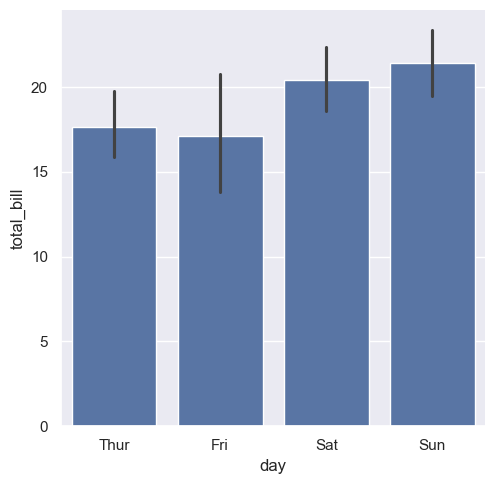

In [38]:
sns.catplot(x='day', y='total_bill', data=tips, kind='bar');

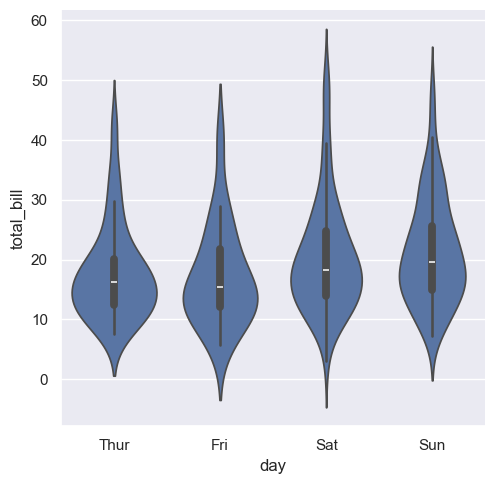

In [39]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin');

Note :

catplot était anciennement appelé factorplot.

![image alt >](Images/numgrade.png)

## Matrix plot

Téléchargeons un autre jeu de données :

In [40]:
flights = sns.load_dataset('flights')

In [41]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


![image alt >](Images/numgrade.png)

### Heat map

Pour tracer une [carte thermique](https://fr.wikipedia.org/wiki/Heat_map), il faut avoir un tableau sous forme de matrice. Voyons un exemple avec une "matrice de corrélation" :

In [42]:
# tips.select_dtypes(include='number') -> only numeric data
tips_corr = tips.select_dtypes(include='number').corr()
tips_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


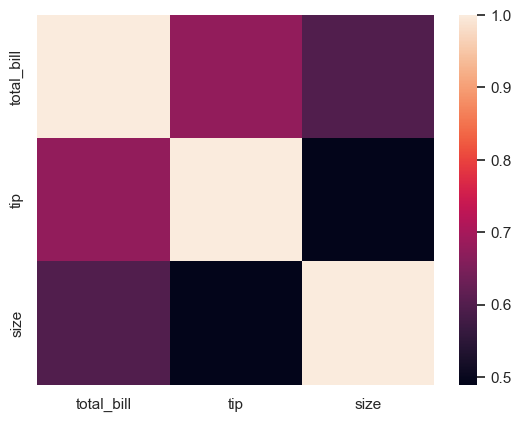

In [43]:
sns.heatmap(tips_corr);

Il est possible d'indiquer la valeur dans chaque cellule avec l'option *annot* :

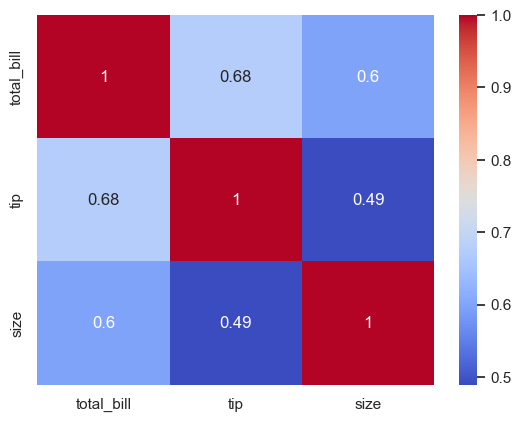

In [44]:
sns.heatmap(tips_corr, annot=True, cmap='coolwarm');

![image alt >](Images/numgrade.png)

Nous avons vu dans la partie pandas qu'il est possible d'obtenir un tableau sous forme de matrice avec *pivot_table* :

In [45]:
flights_pivot = flights.pivot_table(index='month', columns='year', values='passengers', observed=False)
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


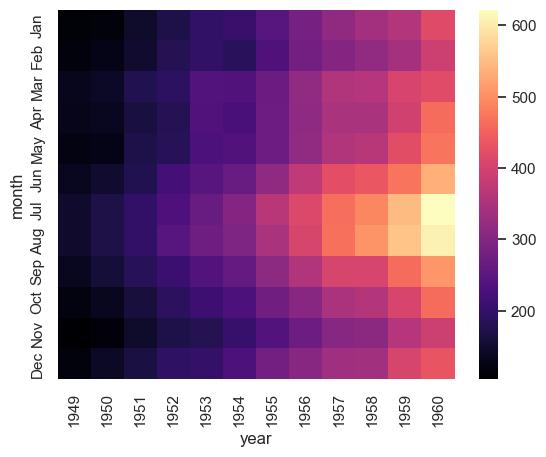

In [46]:
sns.heatmap(flights_pivot, cmap='magma');

Changer la taille d'une figure

In [47]:
sns.set(rc={'figure.figsize': (9.5, 7)})

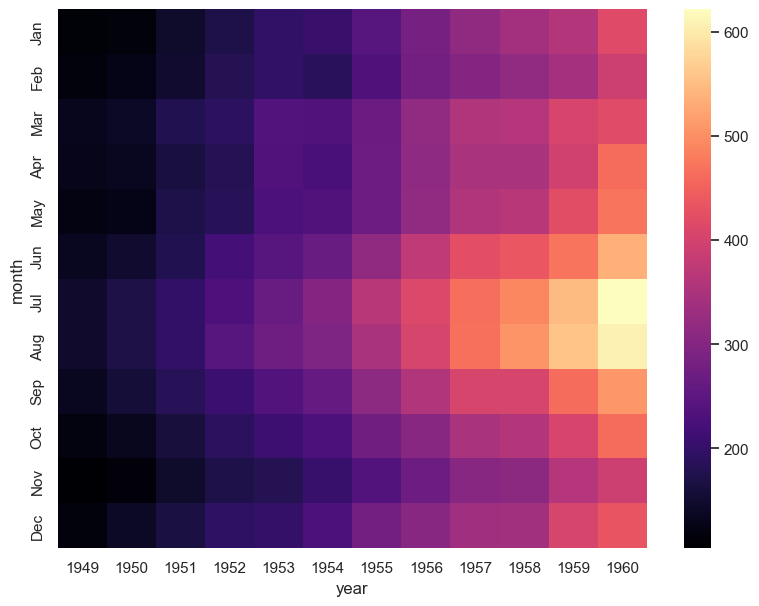

In [48]:
sns.heatmap(flights_pivot, cmap='magma');

Il est possible de customiser la séparation entre les cellules avec les options *linecolor* et *linewidths* :

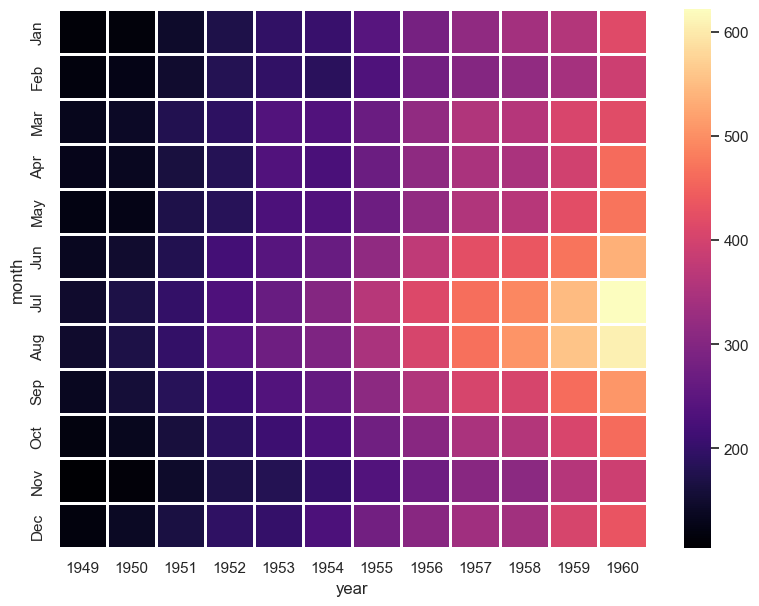

In [49]:
sns.heatmap(flights_pivot, cmap='magma', linecolor='white', linewidths=2);

![image alt >](Images/numgrade.png)

## Regression plot

### L.M. plot or Linear Model

*lmplot()* est une fonction qui combine un nuage de points (scatter plot) et une droite de régression linéaire. Elle est très utile pour visualiser la relation entre deux variables quantitatives et évaluer la qualité d’un ajustement linéaire.

Un exemple simple :

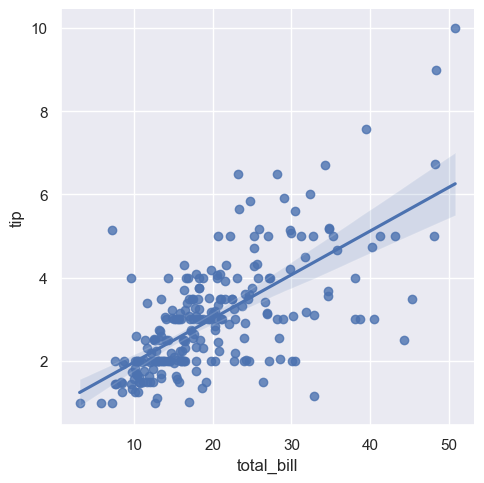

In [61]:
sns.lmplot(x='total_bill', y='tip', data=tips);

![image alt >](Images/numgrade.png)

Il est aussi possible de préciser l'option *hue* pour avoir 2 régressions linéaires :

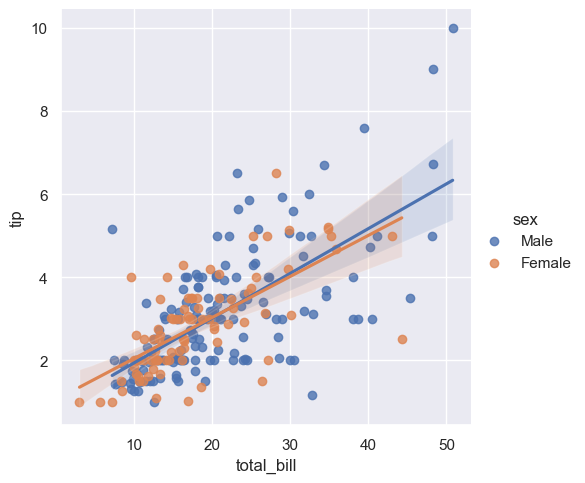

In [62]:
data = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex');

Pour modifier le style, on va retrouver des mots de matplotlib comme *markers* par exemple :

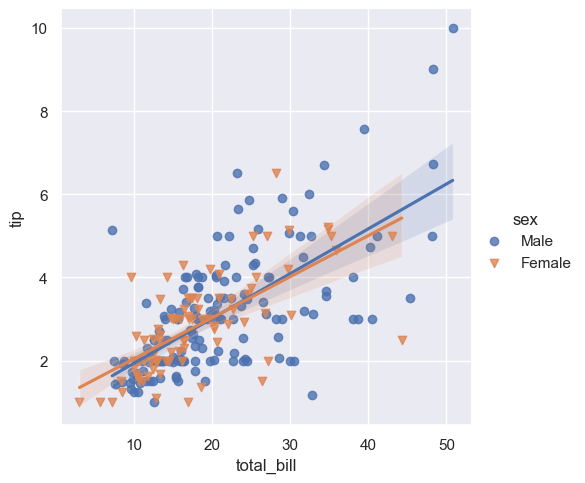

In [63]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v']);

![image alt >](Images/numgrade.png)

Et on peut appeler d'autres paramètres de matplotlib (seaborn fait appel à matplotlib) dans des dictionnaires. Par exemple avec *scatter_kws*, on va préciser la taille des *markers* :

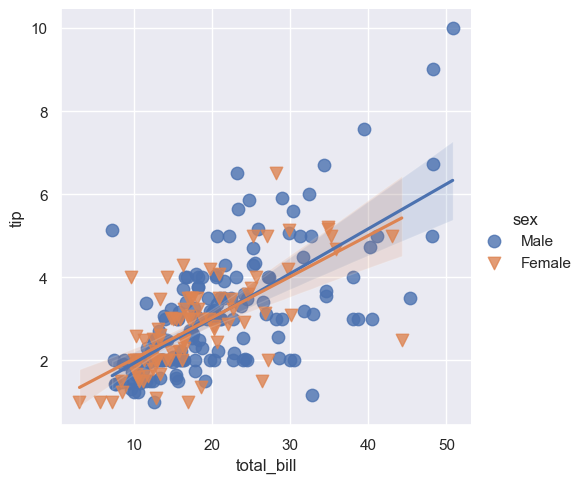

In [64]:
sns.lmplot(
    x='total_bill', 
    y='tip', 
    data=tips, 
    hue='sex', 
    markers=['o', 'v'],
    scatter_kws={'s': 80},
);

![image alt >](Images/numgrade.png)

Si on ne souhaite pas avoir les 2 régressions sur le même graphique, au lieu d'utiliser l'option *hue*, on peut utiliser l'option *col* :

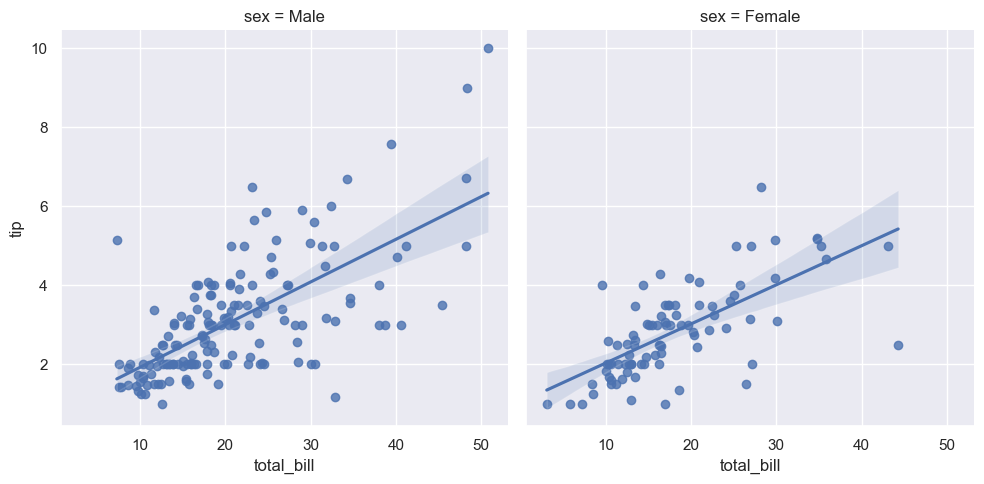

In [65]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex');

De la même manière, on peut rajouter des lignes avec l'option *row* :

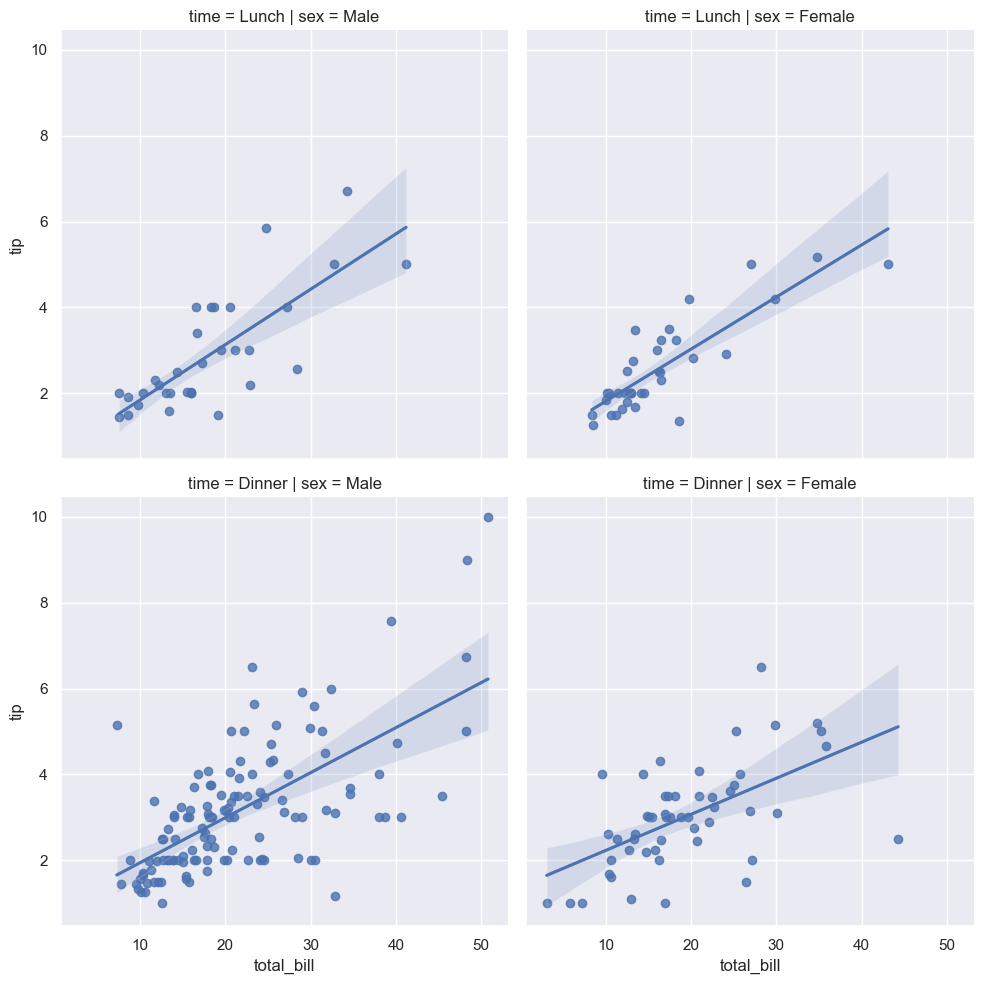

In [66]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time');

![image alt >](Images/numgrade.png)

On peut bien entendu mixer les options *col* et/ou *row* avec *hue* :

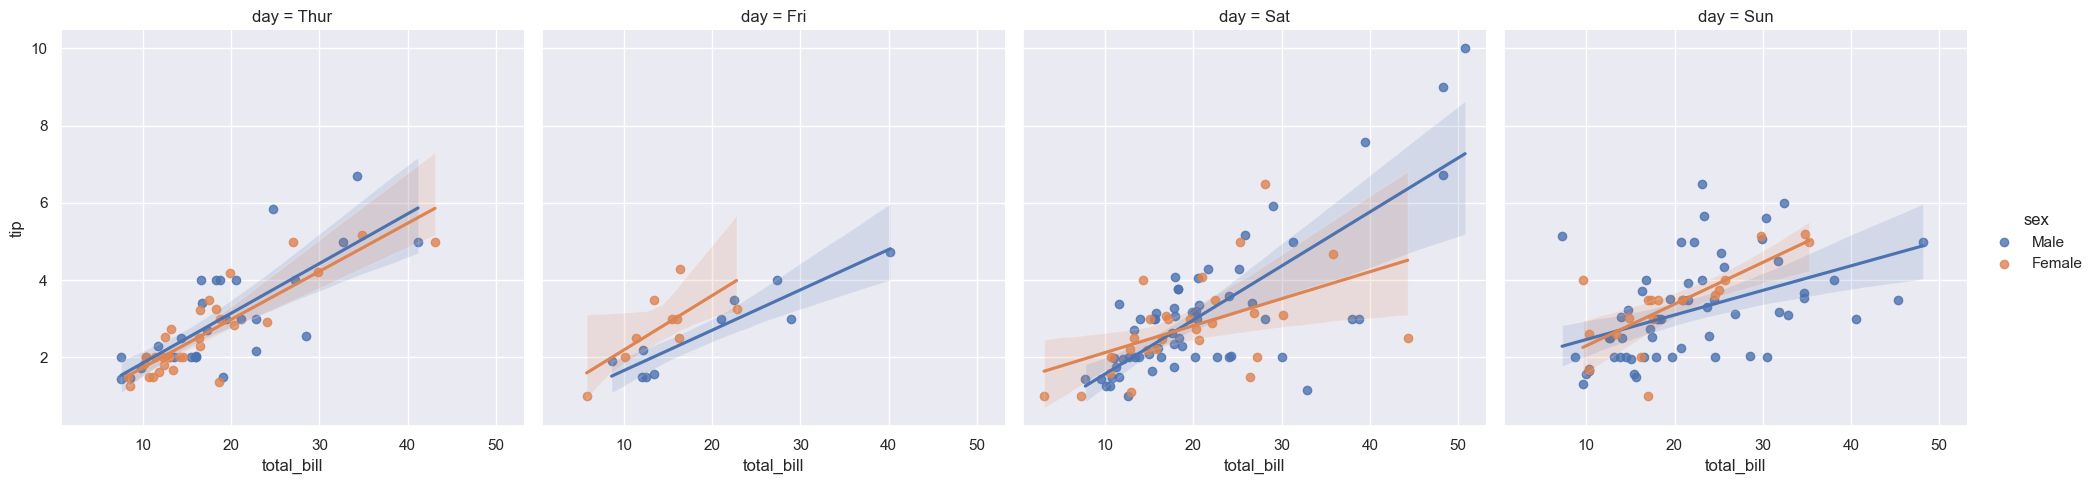

In [67]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex');

![image alt >](Images/numgrade.png)

Pour modifier la taille on pourra avantageusement utiliser les options *aspect* et *height* :

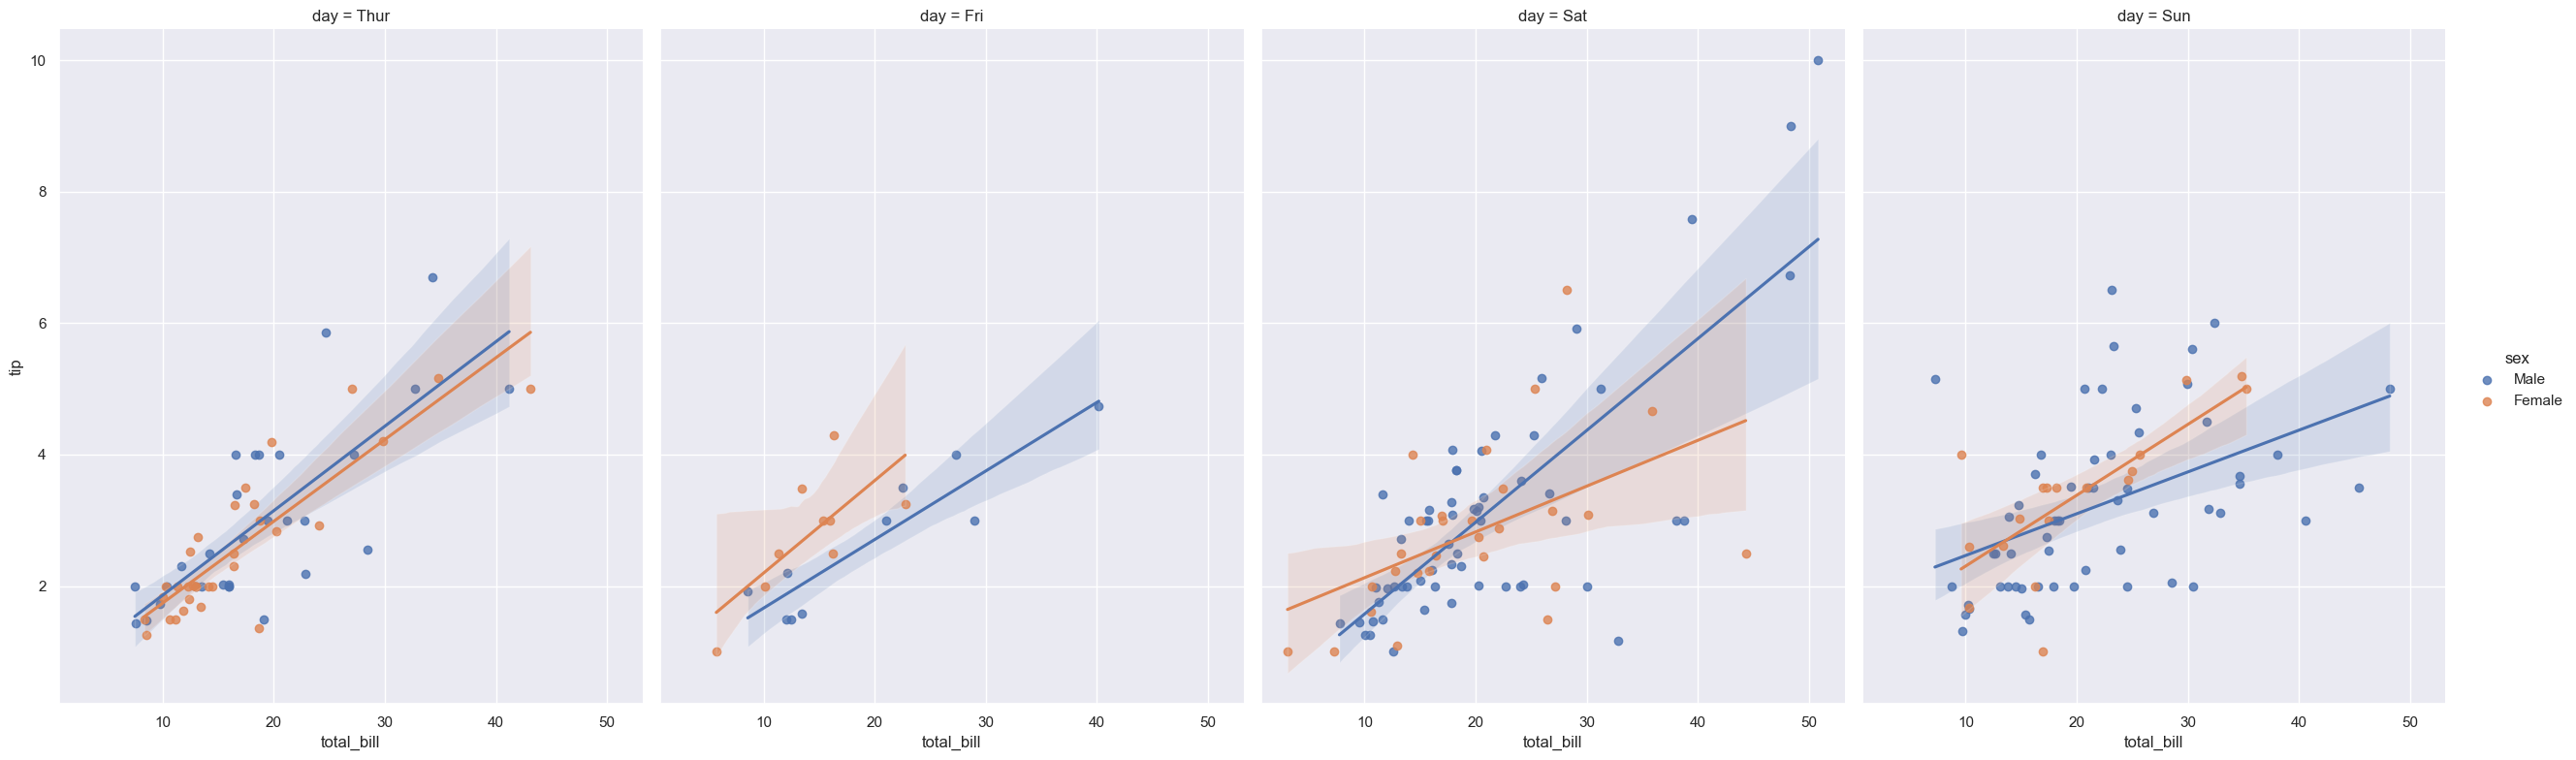

In [68]:
sns.lmplot(
    x='total_bill', 
    y='tip', 
    data=tips, 
    col='day', 
    hue='sex',
    aspect=0.8, 
    height=8
);

![image alt >](Images/numgrade.png)

## Changer le rendu d'une figure seaborn

### Les fonctions set_style(), set_context() et set_theme()

Pour améliorer le style des graphiques, on pourra utilser la méthode *set_style* qui va permettre de dire à seaborn d'utiliser un certain style pour le reste des graphiques :

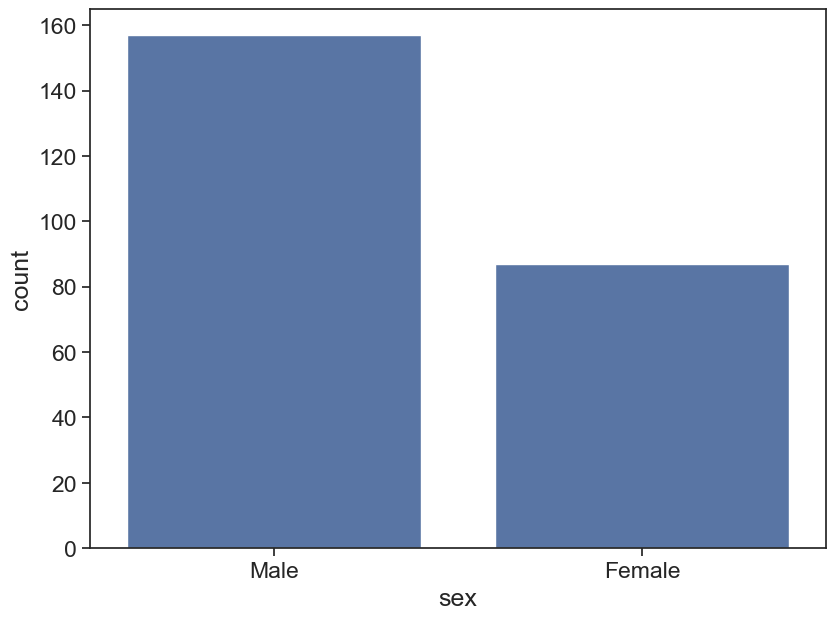

In [80]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips);

Par exemple, avec le contexte "poster", la taille de la police est automatiquement augmentée. Mais il est tout à fait possible d'augmenter la taille de la police manuellement :

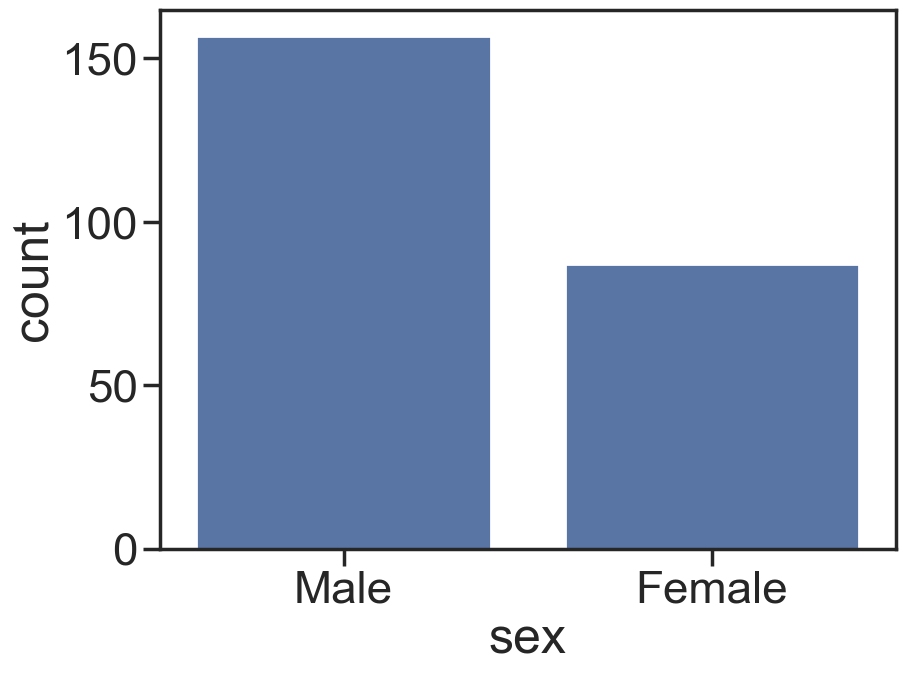

In [82]:
sns.set_context(context='poster', font_scale=1.5)
sns.countplot(x='sex', data=tips);

La fonction *set_theme()* va pouvoir remplacer à la fois *set_style()* et *set_context()* en un seul appel. Exemple :

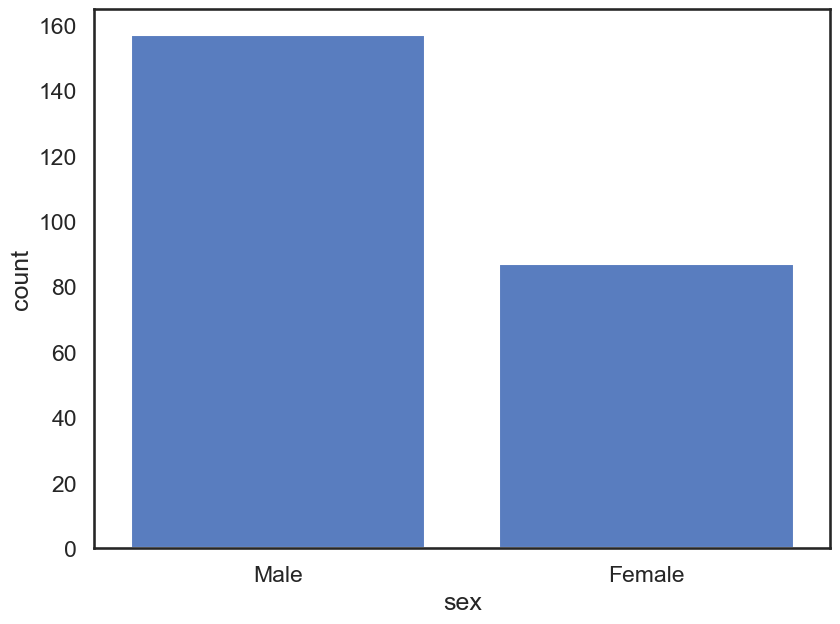

In [84]:
sns.set_theme(style="white", context="talk", palette="muted", font="arial")
sns.countplot(x='sex', data=tips);

*set_theme()* permet de configurer :

- le style (couleurs de fond, grilles, etc.)

- le contexte (taille des éléments, épaisseur des lignes, etc.)

- la palette de couleurs

- la police

Vous pourrez trouver différentes options possibles dans la documentation sur ces 2 liens :

- [https://seaborn.pydata.org/tutorial/aesthetics.html](https://seaborn.pydata.org/tutorial/aesthetics.html)

- [https://seaborn.pydata.org/tutorial/color_palettes.html](https://seaborn.pydata.org/tutorial/color_palettes.html)

![image alt >](Images/numgrade.png)

### La fonction despine()

Il est possible d'enlever les "spines" avec la fonction *despine()* :

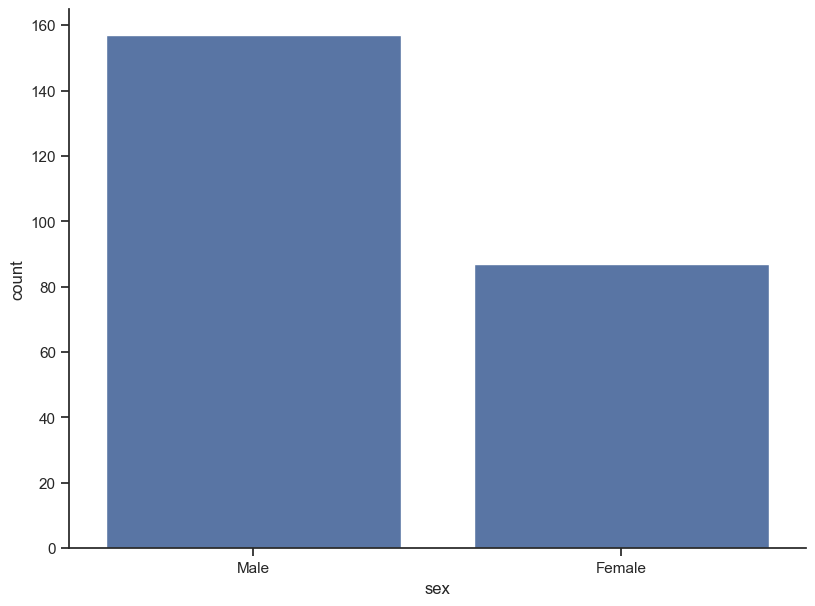

In [70]:
sns.countplot(x='sex', data=tips)
sns.despine();  # by default, remove top and right spines

![image alt >](Images/numgrade.png)

### Taille de la figure

Pour changer la taille de la figure, on peut appeler matplotlib :

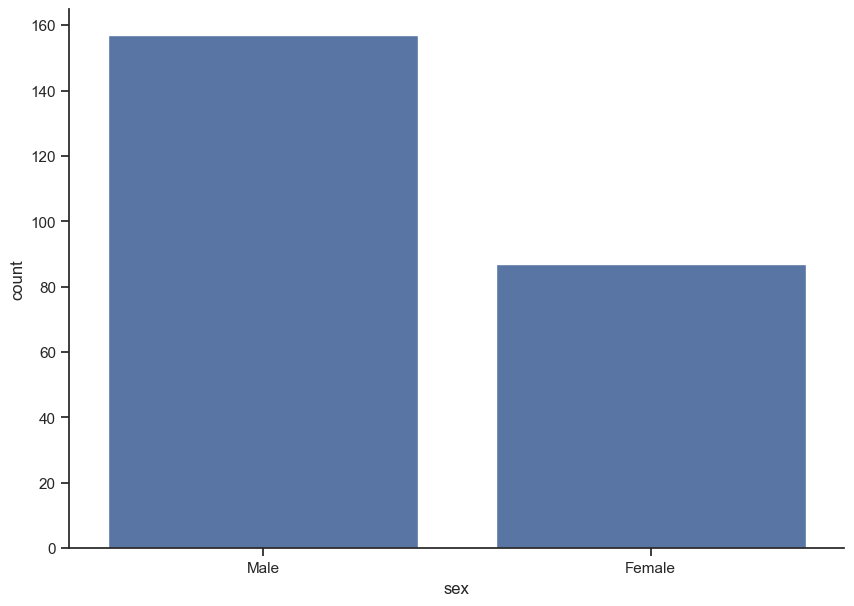

In [71]:
plt.figure(figsize=(10,7))
sns.countplot(x='sex', data=tips)
sns.despine();

Pour la taille de la figure, on pourra aussi utiliser la fonction *set_context()* :

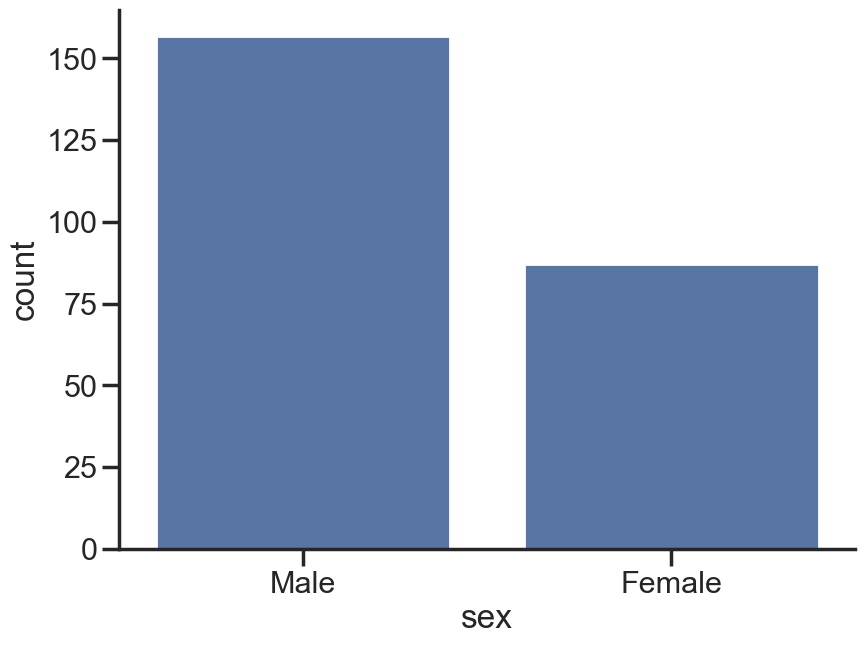

In [72]:
sns.set_context(context='poster')
sns.countplot(x='sex', data=tips)
sns.despine();

![image alt >](Images/numgrade.png)

### Changer les couleurs

In [74]:
sns.set_context(context='notebook', font_scale=1.5)

On modifiera l'option *palette* (notez que pour cette option, on peut choisir les "matplotlib colormap") :

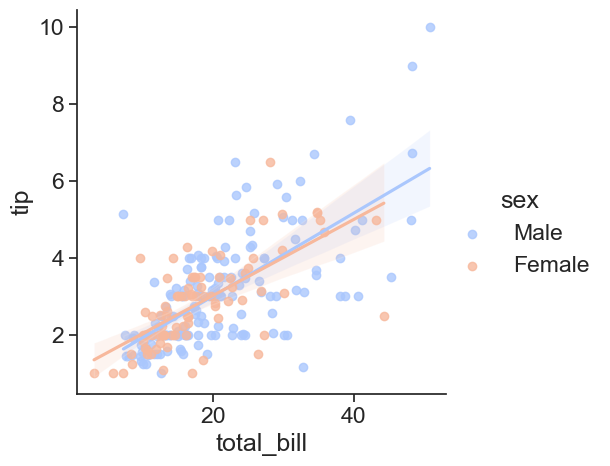

In [75]:
sns.lmplot(x='total_bill', y= 'tip', data=tips, hue='sex', palette='coolwarm');

Il est aussi possible de passer un dictionnaire à palette, ce qui permet de choisir les couleurs désirées :

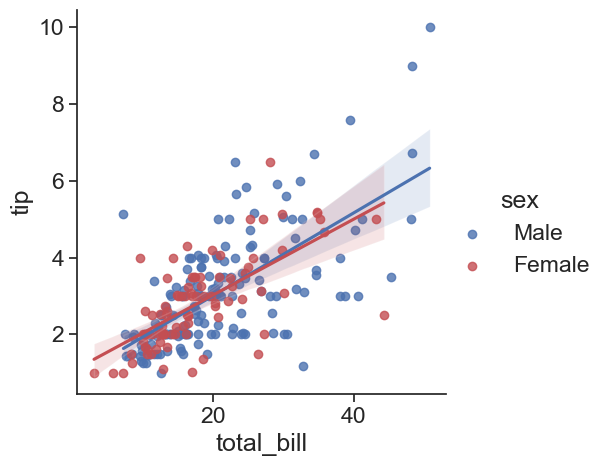

In [76]:
sns.lmplot(
    x='total_bill', 
    y= 'tip', 
    data=tips, 
    hue='sex', 
    palette={"Male": 'b', "Female": 'r'}
);

![image alt >](Images/numgrade.png)

### Ajouter un titre

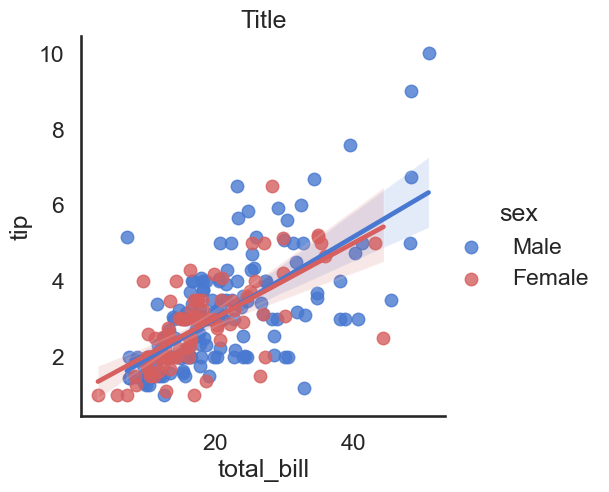

In [85]:
sns.lmplot(
    x='total_bill', 
    y= 'tip', 
    data=tips, 
    hue='sex', 
    palette={"Male": 'b', "Female": 'r'}
);
plt.title("Title");

![image alt >](Images/numgrade.png)

### Sauvegarder la figure

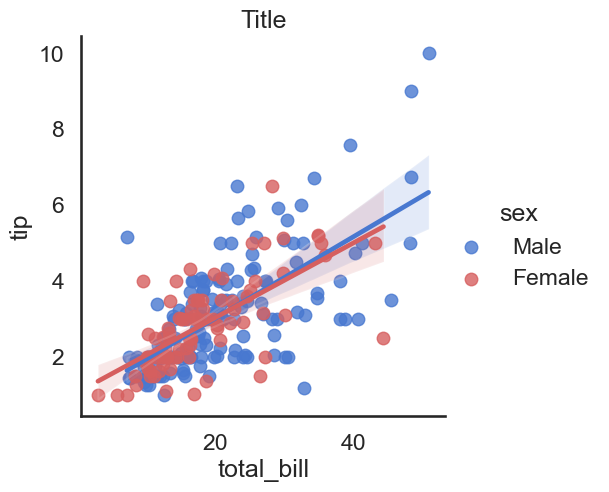

In [86]:
sns.lmplot(
    x='total_bill', 
    y= 'tip', 
    data=tips, 
    hue='sex', 
    palette={"Male": 'b', "Female": 'r'}
);
plt.title("Title")
plt.savefig("test.pdf")

![image alt >](Images/numgrade.png)

### Exercices (difficulté : ⭐⭐) 

**Objectifs pédagogiques**

- Charger un jeu de données de seaborn

- Créer un graphique relationnel et ajouter une régression linéaire

- Créer un graphique qui compare des distributions

- Améliorer le rendu

**Enoncés**

#### Exercice 1

1. Charger le jeu de données intégré tips de seaborn.

2. Créer un graphique qui montre la relation entre le montant total de l’addition (total_bill) et le pourboire (tip), en différenciant les points par jour de la semaine (day - un jour par colonne) et par le sexe (sex - 2 courbes sur chaque plot).

3. Ajouter une régression linéaire pour chaque groupe (sex).

4. Personnaliser le graphique :

- ajouter un titre

- couleur : utiliser la palette "husl".


#### Exercice 2

1. Charger le jeu de données intégré iris de seaborn.

2. Créer un graphique qui compare la distribution de la longueur des pétales (petal_length) pour chaque espèce (species) :

 - Utiliser un boxplot et un violin plot côte à côte pour visualiser la distribution et la densité.

 - Ajouter un swarmplot (sur le graphique boxplot) pour montrer les points individuels.
 
</br>

3. Personnaliser le graphique :
</br>

 - Ajouter un titre : "Distribution de la longueur des pétales par espèce".

 - Ajouter une grille légère.